<a href="https://colab.research.google.com/github/AnkitaAnalytics/Python-for-Data-Science/blob/main/Titanic_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing train_test_split for data splitting and cross_val_score to validating the dataset
from sklearn.model_selection import train_test_split, cross_val_score

#importing Linear Regression model, Ridge and Lasso model (L1, L2)
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#importing mean_squared_error, r2_score and mean_absolute_error to check the accuracy of the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#importing LabelEncoder to encode categorical values into numerical data and Standard Scaler to normalize the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [187]:
data= sns.load_dataset("titanic")

In [188]:
df=data.copy()

### Exploratory Data Analysis(EDA)
* Understanding the data
* Cleaning the data

In [189]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [190]:
df.info() #checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [191]:
#checking data shape and statistics

print(f"Shape of data is {df.shape}")
df.describe()

Shape of data is (891, 15)


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [192]:
# checking for missing values

df.isnull().sum()

# there are 177 values missing in age column, 688 missing in deck column, 2 missing in embarked and 2 missing in embark_town

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [193]:
# since more than 80% data is missing in the deck column we will drop the column

df.drop(columns ="deck", inplace = True)

In [194]:
# checking the mean and median age of the dataset
df["age"].mean()

29.69911764705882

In [195]:
df["age"].median()

28.0

In [196]:
a= df["age"].mode()
a[0]

24.0

In [197]:
# filling the missing values with median
df["age"].fillna(df["age"].median(), inplace = True)

<ipython-input-197-86628025982d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace = True)


In [198]:
#checking the mode for embark_town and filling the missing values with it
e= df["embark_town"].mode()
df["embark_town"].fillna(e[0], inplace = True)

<ipython-input-198-ba29d6a6e313>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["embark_town"].fillna(e[0], inplace = True)


In [199]:
#checking the mode for embarked and filling the missing values with it
f=df["embarked"].mode()[0]
df["embarked"].fillna(f,inplace = True)

<ipython-input-199-e34db7400df0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["embarked"].fillna(f,inplace = True)


In [200]:
#checking for null values
df.isnull().sum()

#now our data has no missing values

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [201]:
df["who"].value_counts()

,count
who,
man,537
woman,271
child,83


In [202]:
df["alive"].value_counts()

,count
alive,
no,549
yes,342


In [203]:
df["survived"].value_counts()

,count
survived,
0,549
1,342


In [204]:
df["embark_town"].value_counts()

,count
embark_town,
Southampton,646
Cherbourg,168
Queenstown,77


In [205]:
df["embarked"].value_counts()

,count
embarked,
S,646
C,168
Q,77


In [206]:
df["adult_male"].value_counts()

,count
adult_male,
True,537
False,354


In [207]:
df["alone"].value_counts()

,count
alone,
True,537
False,354


* dropping unneccessary columns

In [208]:

# class and pclass are same and hence dropping class as its a categorical value
# dropping who since we can classify man, woman from sex column and child from age
# dropping alive since surviced and alive have same values and alive is in categorical format
#dropping embark_town since its same to embarked
#dropping adult male since it can be checked from sex and age columns


df.drop(columns=["class","who","alive","embark_town", "adult_male"],inplace = True)


In [209]:
df.drop(columns="alone",inplace=True)

In [210]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

* replacing categorical data to numerical data
**sex**
male = 1
female = 0

**embarked**
S=1
C=2
Q=3

In [211]:
df["sex"]= df["sex"].apply(lambda x: 1 if x=="male" else 0)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [222]:
df.shape

(891, 8)

In [212]:
# using label encoder

#a= LabelEncoder()
df["embarked"]=LabelEncoder().fit_transform(df["embarked"])


In [213]:
df["embarked"].value_counts()

,count
embarked,
2,646
0,168
1,77


<Axes: >

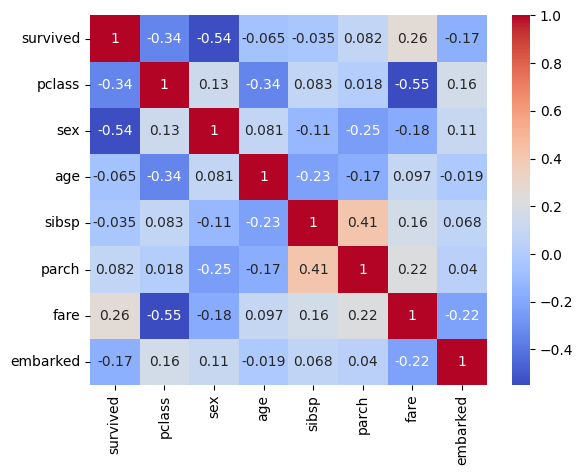

In [214]:
# checking correlation in the dataset

sns.heatmap(df.corr(),annot = True, cmap="coolwarm")

#there is no significant correlation found between any variables and hence we are going to use all the variable for the model creation

### EDA

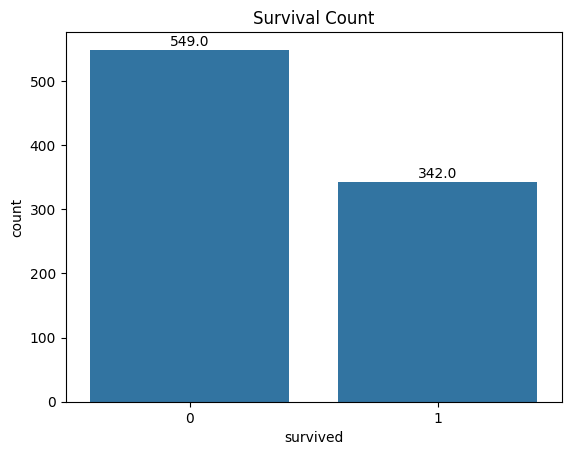

In [215]:
sns.countplot(x="survived", data=df)
plt.title("Survival Count")
# Adding annotations
for p in plt.gca().patches:  # Iterate over the bars
    count = p.get_height()  # Get the height of each bar
    plt.text(p.get_x() + p.get_width() / 2., count + 2,  # Position above the bar
             f'{count}', ha='center',va="bottom")  # Annotate the count


plt.show()

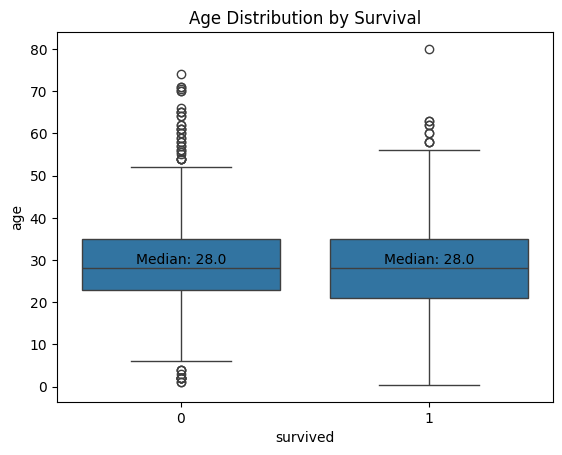

In [216]:
# age distribution for survivors and non survivors

sns.boxplot(x="survived",y="age",data=df)
plt.title("Age Distribution by Survival")
# Adding annotations
grouped = df.groupby('survived')['age']
for i, (survived, group) in enumerate(grouped):
    median = group.median()  # Calculate the median
    plt.text(i, median + 1, f'Median: {median:.1f}',
             ha='center', color='black', fontsize=10)

plt.show()

<Axes: xlabel='survived', ylabel='pclass'>

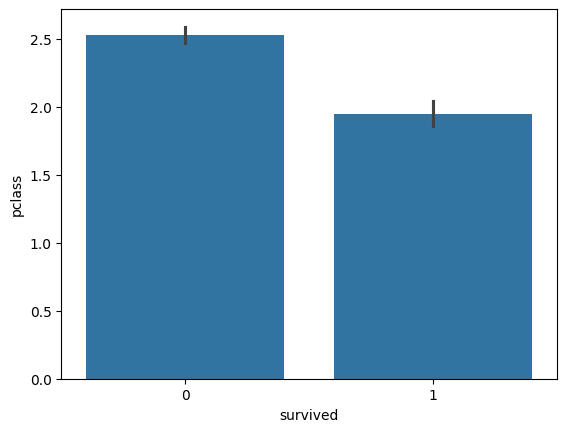

In [217]:
sns.barplot(y="pclass",x="survived",data=df)

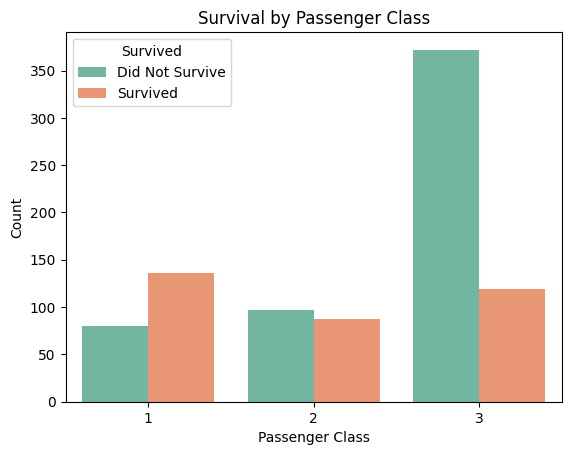

In [218]:
sns.countplot(x='pclass', hue='survived', data=df, palette='Set2')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'], title='Survived')
plt.show()

### Spliting the data into training and testing

In [219]:
# target variable - on which variable we have to create model
# feature variable - all other variable other than feature as there is no significant correalation btw any variables

In [220]:
#creating feature variable
x= df.drop(columns="survived")

In [221]:
x.shape

(891, 7)

In [223]:
#creating target variable
y= df["survived"]

In [224]:
y.shape

(891,)

In [225]:
# splitting the data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


* checking shape of tarin and test dataset

In [226]:
x_train.shape

(712, 7)

In [227]:
x_test.shape

(179, 7)

In [228]:
y_train.shape

(712,)

In [229]:
y_test.shape

(179,)

In [230]:
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [231]:
y_predict= model.predict(x_test)

In [232]:
y_predict

array([ 0.12362106,  0.24681387,  0.1438528 ,  0.86647691,  0.72243886,
        0.96268986,  0.65763438,  0.08870009,  0.71384991,  0.93672145,
        0.34867525,  0.03146612,  0.4909599 ,  0.1701863 ,  0.22427839,
        0.97548073,  0.32505832,  0.6576625 ,  0.26644004,  0.34017265,
        0.12510392,  0.39203644,  0.62438462,  0.14431438,  0.10871032,
        0.04149244,  0.43777271,  0.24770153,  0.06960021,  0.60690334,
        0.14852706,  0.64902799,  0.49504455,  0.62084921,  0.15326643,
        0.14807276,  0.42332202,  0.65763438,  1.00038989,  0.10636541,
        0.23856065,  0.06264474,  0.10642016,  0.1430278 ,  0.59704215,
        0.07310405,  0.14862026,  0.1302605 ,  0.12480361,  0.34373029,
        0.70866452,  0.78730884, -0.06167418,  0.45413301, -0.03030341,
        0.96035463,  0.24212924,  0.96352779,  0.74641011,  0.6998419 ,
        0.13911491,  0.82889117,  0.74224357,  0.41992229,  0.1430278 ,
        0.63962014,  0.31602914,  0.1016734 ,  0.17230556,  0.87

In [233]:
#checking model accuracy

mse= mean_squared_error(y_test,y_predict)
r2s= r2_score(y_test, y_predict)
mae= mean_absolute_error(y_test,y_predict)

print(f"mean squared error is: {mse}")
print(f" r2 score is: {r2s}")
print(f"mean absolute error is: {mae}")

mean squared error is: 0.1351938212761502
 r2 score is: 0.4425038317234068
mean absolute error is: 0.28552309459008085


the r2 score is 0.44 which is not that good